# ALGOMERA: Algorithm for medical rare resources allocation

## Performances

In this notebook, we will analyze the performances reached by the algorithm that allocate rare medical ressources.

In [1]:
import time
import matplotlib.pyplot as plt
import os

from csv_handler import CsvHandler
from scheduling import Scheduling

In [2]:
users_files = ['../csv_files/users_ex1.csv', '../csv_files/users/users_20.csv', '../csv_files/users/users_40.csv',
         '../csv_files/users/users_60.csv', '../csv_files/users/users_80.csv', '../csv_files/users/users_100.csv',
        '../csv_files/users/users_120.csv', '../csv_files/users/users_140.csv', '../csv_files/users/users_160.csv',
        '../csv_files/users/users_180.csv', '../csv_files/users/users_200.csv', '../csv_files/users/users_220.csv',
        '../csv_files/users/users_240.csv', '../csv_files/users/users_260.csv', '../csv_files/users/users_280.csv',
        '../csv_files/users/users_300.csv', '../csv_files/users/users_400.csv', '../csv_files/users/users_500.csv',
        '../csv_files/users/users_600.csv']

slots_files = ['../csv_files/slots_ex1.csv', '../csv_files/slots/slots_20.csv', '../csv_files/slots/slots_40.csv',
              '../csv_files/slots/slots_60.csv', '../csv_files/slots/slots_80.csv', '../csv_files/slots/slots_100.csv',
              '../csv_files/slots/slots_120.csv', '../csv_files/slots/slots_140.csv', '../csv_files/slots/slots_160.csv',
              '../csv_files/slots/slots_180.csv', '../csv_files/slots/slots_200.csv', '../csv_files/slots/slots_220.csv',
              '../csv_files/slots/slots_240.csv', '../csv_files/slots/slots_260.csv', '../csv_files/slots/slots_280.csv',
              '../csv_files/slots/slots_300.csv', '../csv_files/slots/slots_400.csv', '../csv_files/slots/slots_500.csv',
                '../csv_files/slots/slots_600.csv']

center_file = '../csv_files/geojson_centre.csv'
appointment_file = '../csv_files/appointments.csv'

### Execution time

We will start by analysing the behaviour of the execution time when the number of input variables, users and slots, varies. To do this we will run the program with a number of users and slots ranging from 4 to 300 in steps of 20 and from to 300 to 600 in steps of 100 and compute the execution time for each iteration.

In [3]:
times = []

for i in range(len(users_files)):
    print(users_files[i])
    
    start_time = time.time()
    
    # First retrieve the data, stored in csv files
    handler = CsvHandler(users_files[i], slots_files[i], center_file, appointment_file)
    centers = handler.center_data()
    slots = handler.slot_data(centers)
    users = handler.user_data()

    # Establish the lists of preferences and priorities
    for user in users:
        user.user_preferred_slots(centers)
    for slot in slots:
        slot.slot_priority_users(users)

    # Schedule the appointments
    schedule = Scheduling(users, slots)

    # Update the csv files according to the scheduling made
    for appointment in schedule.current:
        handler.write_appointment_to_file(appointment)
    handler.change_processed(users, True)
    handler.change_availability(slots, False)
    
    # Compute the execution time
    stop_time = time.time()
    exec_time = stop_time - start_time
    times.append(exec_time)

    # Assign restart to True if you want to be able to redo the scheduling with the same users and
    # slots later on. It will put back the attributes 'processed' to False and 'availability' to True.
    restart = True
    if restart:
        handler.change_processed(users, False)
        handler.change_availability(slots, True)

../csv_files/users_ex1.csv
../csv_files/users/users_20.csv
../csv_files/users/users_40.csv
../csv_files/users/users_60.csv
../csv_files/users/users_80.csv
../csv_files/users/users_100.csv
../csv_files/users/users_120.csv
../csv_files/users/users_140.csv
../csv_files/users/users_160.csv
../csv_files/users/users_180.csv
../csv_files/users/users_200.csv
../csv_files/users/users_220.csv
../csv_files/users/users_240.csv
../csv_files/users/users_260.csv
../csv_files/users/users_280.csv
../csv_files/users/users_300.csv
../csv_files/users/users_400.csv
../csv_files/users/users_500.csv
../csv_files/users/users_600.csv


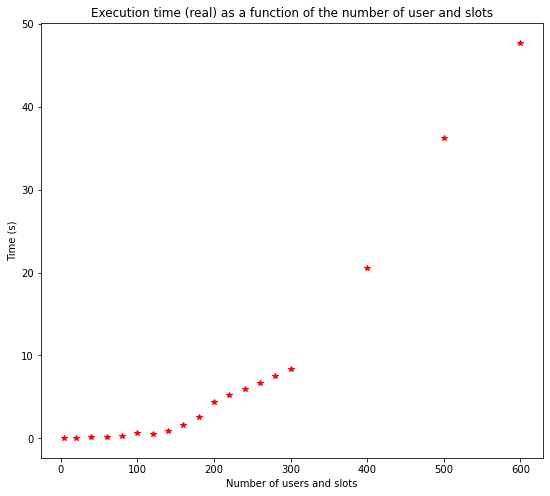

In [4]:
sample = [4, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 400, 500, 600]

plt.figure(figsize=(9,8))
plt.title("Execution time (real) as a function of the number of user and slots")
plt.ylabel("Time (s)")
plt.xlabel("Number of users and slots")
plt.plot(sample, times, 'r*')
plt.savefig("exec.png",bbox_inches='tight')
plt.show()

### Memory usage

We will now analyse the behaviour of the memory when the number of input variables, users and slots, varies. To do this we will run the program with a number of users and slots ranging from 4 to 300 in steps of 20 and compute the memory usage for each iteration. This has been done using the psutil library, which returned the usage of the memory befor and after the execution of the program.

In [24]:
mem4 = 61480960 - 60534784
mem20 = 61571072 - 60514304
mem40 = 61665280 - 60538880
mem60 = 61857792 - 60555264
mem80 = 61956096 - 60563456
mem100 = 62078976 - 60538880
mem120 = 62353408 - 60571648
mem140 = 62590976 - 60612608
mem160 = 62640128 - 60514304
mem180 = 62763008 - 60506112
mem200 = 62885888 - 60571648
mem220 = 63307776 - 60514304
mem240 = 63508480 - 60514304
mem260 = 63893504 - 60575744
mem280 = 63807488 - 60502016
mem300 = 64172032 - 60514304

mem = [mem4, mem20, mem40, mem60, mem80, mem100, mem120, mem140, mem160, mem180, mem200, mem220, mem240, mem260, mem280, mem300]
sample = [4, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

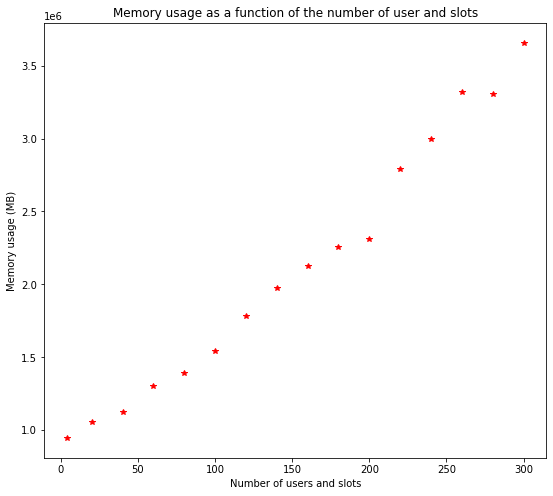

In [25]:
plt.figure(figsize=(9,8))
plt.title("Memory usage as a function of the number of user and slots")
plt.ylabel("Memory usage (MB)")
plt.xlabel("Number of users and slots")
plt.plot(sample, mem, 'r*')
plt.savefig("mem.png",bbox_inches='tight')
plt.show()